In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_json('etsynecklacefull.json')

In [3]:
len(df)

439

In [4]:
df.head()

,cur,description,favorites,image_urls,images,overview,price,script,title
0,USD,[\n Delicate baguette diamond Solitaire Ne...,938.0,[https://i.etsystatic.com/11493911/r/il/034d80...,[{'url': 'https://i.etsystatic.com/11493911/r/...,"[\n Handmade item\n, \n Gemstone: Diamon...",389.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...","Baguette Diamond Necklace, Diamond Solitaire N..."
1,USD,"[\n Something old,, Something new,, Somethi...",87.0,[https://i.etsystatic.com/7249318/r/il/0163b5/...,[{'url': 'https://i.etsystatic.com/7249318/r/i...,"[\n Pendant height: 19\n, \n Pendant wid...",10.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Sixpence Bezel Holder Pendant
2,USD,"[\n *************************, Please write...",4196.0,[https://i.etsystatic.com/6666729/r/il/c0f976/...,[{'url': 'https://i.etsystatic.com/6666729/r/i...,"[\n Handmade item\n, \n Gemstone: Turquo...",14.50,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Initial Necklace Personalized Birthstone Neckl...
3,USD,"[\n *3 Colors Pineapple Necklace, *The pend...",2005.0,[https://i.etsystatic.com/12209477/r/il/c3fa48...,[{'url': 'https://i.etsystatic.com/12209477/r/...,"[\n Handmade item\n, \n Materials: Gold ...",7.50,"[\n {\n ""@type"": ""Product"",\n ""@conte...","Rose Gold Pineapple Necklace, Fruit Necklace, ..."
4,USD,[\n ↡ Get 10% off your order when you join ...,7501.0,[https://i.etsystatic.com/9886199/r/il/61a5e1/...,[{'url': 'https://i.etsystatic.com/9886199/r/i...,"[\n Handmade item\n, \n Closure: Lobster...",4.25,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Boho Charm Choker Necklace - Leather Choker - ...


In [5]:
usdf=df[df['cur']=='USD']
len(usdf)

368

In [6]:
usdf['price'] = pd.to_numeric(usdf['price'].apply(lambda x: x.replace(',','')))

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
usdf['description'] = usdf['description'].apply(lambda x: ''.join(x).strip())

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
linkregex = r"((([A-Za-z]{3,9}:(?:\/\/)?)(?:[-;:&=\+\$,\w]+@)?[A-Za-z0-9.-]+|(?:www.|[-;:&=\+\$,\w]+@)[A-Za-z0-9.-]+)((?:\/[\+~%\/.\w\-_]*)?\??(?:[-\+=&;%@.\w_]*)#?(?:[\w]*))?)"
usdf['description'] = usdf['description'].str.replace(linkregex, '')
usdf['description'] = usdf['description'].str.replace(r"[^a-zA-Z\d\s]", '')
usdf['description'].str.lower()

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      delicate baguette diamond  solitaire necklace ...
1      something oldsomething newsomething borrowedso...
2      please write a note your initials or birth mon...
3      3 colors pineapple necklacethe pendant measure...
4       get 10 off your order when you join our email...
5      here is a nice pair of hetian nephrite jade pe...
6      i designed and created this beautiful pink and...
7      certified rare bean raw baltic amber teething ...
8      sale  save 5 off your 25 purchase with code oh...
9      a wooden pendant for women new wooden necklace...
10     listing for one strand of druzy necklacemateri...
11     new item vertical bar necklace custom coordina...
12     necklace for prom with 12 butterfliesdetails a...
13     rose gold serotonin necklace  silver molecule ...
14     rose gold stamped bar necklace by cheech and c...
16     long gray moonstone pendant necklacethis long ...
17     all of our products are handmadecalifornia sta...
18     name necklace silver nam

In [9]:
usdf['description'] = usdf['description'].str.lower()

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/eli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

In [12]:
usdf['desc'] = usdf['description'].apply(lambda desc: ' '.join([stemmer.stem(x) for x in desc.split()]))

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
from nltk.corpus import stopwords
s=set(stopwords.words('english'))

In [14]:
usdf['desc'] = usdf['desc'].apply(lambda desc: ' '.join([x for x in desc.split() if not x in s]))

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
usdf.head()

,cur,description,favorites,image_urls,images,overview,price,script,title,desc
0,USD,delicate baguette diamond solitaire necklace ...,938.0,[https://i.etsystatic.com/11493911/r/il/034d80...,[{'url': 'https://i.etsystatic.com/11493911/r/...,"[\n Handmade item\n, \n Gemstone: Diamon...",389.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...","Baguette Diamond Necklace, Diamond Solitaire N...",delic baguett diamond solitair necklac gold en...
1,USD,something oldsomething newsomething borrowedso...,87.0,[https://i.etsystatic.com/7249318/r/il/0163b5/...,[{'url': 'https://i.etsystatic.com/7249318/r/i...,"[\n Pendant height: 19\n, \n Pendant wid...",10.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Sixpence Bezel Holder Pendant,someth oldsometh newsometh borrowedsometh blue...
2,USD,please write a note your initials or birth mon...,4196.0,[https://i.etsystatic.com/6666729/r/il/c0f976/...,[{'url': 'https://i.etsystatic.com/6666729/r/i...,"[\n Handmade item\n, \n Gemstone: Turquo...",14.50,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Initial Necklace Personalized Birthstone Neckl...,pleas write note initi birth month note lalacr...
3,USD,3 colors pineapple necklacethe pendant measure...,2005.0,[https://i.etsystatic.com/12209477/r/il/c3fa48...,[{'url': 'https://i.etsystatic.com/12209477/r/...,"[\n Handmade item\n, \n Materials: Gold ...",7.50,"[\n {\n ""@type"": ""Product"",\n ""@conte...","Rose Gold Pineapple Necklace, Fruit Necklace, ...",3 color pineappl necklaceth pendant measur 8mm...
4,USD,get 10 off your order when you join our email...,7501.0,[https://i.etsystatic.com/9886199/r/il/61a5e1/...,[{'url': 'https://i.etsystatic.com/9886199/r/i...,"[\n Handmade item\n, \n Closure: Lobster...",4.25,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Boho Charm Choker Necklace - Leather Choker - ...,get 10 order join email list join choker neckl...


In [16]:
from nltk.probability import FreqDist

In [17]:
%%time
fdist = FreqDist(word for word in ' '.join(usdf['desc'].values).split() if not word.isnumeric())

CPU times: user 124 ms, sys: 4 ms, total: 128 ms
Wall time: 128 ms


In [18]:
fdist.pprint(maxlen=20)

FreqDist({'necklac': 2516, 'gold': 1702, 'pleas': 1107, 'gift': 1084, 'silver': 1013, 'jewelri': 944, 'chain': 878, 'order': 827, 'ship': 814, 'length': 738, 'sterl': 699, 'pendant': 689, 'us': 663, 'e': 616, 'item': 612, 'piec': 546, 'fill': 541, 'note': 540, 'person': 518, 'made': 509, ...})


In [19]:
import re
usdf['adesc'] = usdf['desc'].apply(lambda desc: ' '.join([x for x in desc.split() if not bool(re.search(r'\d', x))]))

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
descs = usdf['adesc'].values

In [79]:
vectorizer = TfidfVectorizer()
tfidf =  vectorizer.fit_transform(descs)
feature_names = vectorizer.get_feature_names()
denselist = tfidf.todense().tolist()

In [88]:
vectorizer.inverse_transform(tfidf)

[array(['delic', 'baguett', 'diamond', 'solitair', 'necklac', 'gold',
        'engag', 'wed', 'birthston', 'valentin', 'day', 'giftthi',
        'perfect', 'proport', 'great', 'stapl', 'style', 'easi', 'wear',
        'work', 'everyday', 'yet', 'transit', 'sexi', 'littl', 'sparkl',
        'night', 'town', 'absolut', 'gorgeous', 'alon', 'layer', 'set',
        'solid', 'encas', 'around', 'cut', 'chain', 'shown', 'photo',
        'guarante', 'natur', 'conflictfre', 'spec', 'ct', 'goldmad',
        'orderreadi', 'ship', 'within', 'busi', 'find', 'answer',
        'frequent', 'ask', 'question', 'pleas', 'read', 'shop', 'polici',
        'purchas', 'product', 'order', 'allow', 'timewarranti', 'stand',
        'jewelri', 'metal', 'piec', 'break', 'contact', 'us', 'immedi',
        'nocost', 'repair', 'one', 'year', 'datepleas', 'visit',
        'warranti', 'section', 'detail', 'etsi', 'address', 'handmad',
        'see', 'return', 'prior', 'avoid', 'restock', 'feesfind', 'featur',
        '

In [83]:
usdf[usdf.price>100]

,cur,description,favorites,image_urls,images,overview,price,script,title,desc,adesc,clusters
0,USD,delicate baguette diamond solitaire necklace ...,938.0,[https://i.etsystatic.com/11493911/r/il/034d80...,[{'url': 'https://i.etsystatic.com/11493911/r/...,"[\n Handmade item\n, \n Gemstone: Diamon...",389.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...","Baguette Diamond Necklace, Diamond Solitaire N...",delic baguett diamond solitair necklac gold en...,delic baguett diamond solitair necklac gold en...,16
5,USD,here is a nice pair of hetian nephrite jade pe...,275.0,[https://i.etsystatic.com/7945345/r/il/12d5b2/...,[{'url': 'https://i.etsystatic.com/7945345/r/i...,"[\n Vintage item\n, \n Materials: nephri...",3800.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Pair of Certified Chinese Hetian Nephrite Jade...,nice pair hetian nephrit jade pendant great mo...,nice pair hetian nephrit jade pendant great mo...,9
12,USD,necklace for prom with 12 butterfliesdetails a...,811.0,[https://i.etsystatic.com/6629585/r/il/22c686/...,[{'url': 'https://i.etsystatic.com/6629585/r/i...,"[\n Handmade item\n, \n Materials: natur...",143.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...","Prom butterfly necklace, prom necklace, beauti...",necklac prom 12 butterfliesdetail butterfli ne...,necklac prom butterfliesdetail butterfli neckl...,16
21,USD,details materials handdyed shibori silk ribbon...,301.0,[https://i.etsystatic.com/10854769/r/il/51a25a...,[{'url': 'https://i.etsystatic.com/10854769/r/...,"[\n Handmade item\n, \n Adjustable lengt...",175.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Green purple necklace Unique necklace Beaded b...,detail materi handdi shibori silk ribbon souta...,detail materi handdi shibori silk ribbon souta...,16
85,USD,special order,26.0,[https://i.etsystatic.com/8042223/r/il/33052c/...,[{'url': 'https://i.etsystatic.com/8042223/r/i...,"[\n Handmade item\n, \n Made to order\n,...",129.50,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Special order,special order,special order,8
106,USD,turquoise cabochon 77mm mounted in a 14k yello...,155.0,[https://i.etsystatic.com/5906330/r/il/91eff5/...,[{'url': 'https://i.etsystatic.com/5906330/r/i...,"[\n Handmade item\n, \n Gemstone: Turquo...",104.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Turquoise Pendant Crown 14k Gold,turquois cabochon 77mm mount 14k yellow gold c...,turquois cabochon mount yellow gold crown beze...,16
126,USD,xivn140 asymmetrical station necklacecollectio...,394.0,[https://i.etsystatic.com/5830604/r/il/d2023f/...,[{'url': 'https://i.etsystatic.com/5830604/r/i...,"[\n Handmade item\n, \n Materials: gold,...",735.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...","Diamond Station Necklace, Diamond by the Yard ...",xivn140 asymmetr station necklacecollect xiv a...,asymmetr station necklacecollect xiv asymmetri...,16
127,USD,watermelon tourmaline necklace october birthst...,3049.0,[https://i.etsystatic.com/6013071/r/il/a75464/...,[{'url': 'https://i.etsystatic.com/6013071/r/i...,"[\n Handmade item\n, \n Bead material: G...",178.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...","Watermelon Tourmaline Necklace, October Births...",watermelon tourmalin necklac octob birthston n...,watermelon tourmalin necklac octob birthston n...,16
128,USD,outstanding arts and crafts era necklace featu...,923.0,[https://i.etsystatic.com/10651446/r/il/d03aa6...,[{'url': 'https://i.etsystatic.com/10651446/r/...,"[\n Vintage item from 1900 - 1909\n, \n ...",1425.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Arts and Crafts Art Nouveau Jugendstil Floral ...,outstand art craft era necklac featur crocus f...,outstand art craft era necklac featur crocus f...,15
131,USD,white rose wedding beaded statement necklace ...,1677.0,[https://i.etsystatic.com/11992054/r/il/7611c3...,[{'url': 'https://i.etsystatic.com/11992054/r/...,"[\n Handmade item\n, \n Necklace length:...",189.21,"[\n {\n ""@type"": ""Product"",\n ""@conte...",White Rose Wedding Beaded statement neckl

In [82]:
tfidffeatures = pd.DataFrame(denselist, columns=feature_names)

In [89]:
s = tfidffeatures.iloc[0]
s[s>0].sort_values(ascending=False)[:10]

diamond       0.455108
baguett       0.451846
polici        0.131408
purchas       0.125665
return        0.120899
cut           0.117991
day           0.113941
goldmad       0.112961
proport       0.112961
orderreadi    0.112961
Name: 0, dtype: float64

In [22]:
tfidf.shape

(368, 5859)

In [23]:
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(tfidf)

In [24]:
from sklearn.manifold import TSNE

In [25]:
%%time
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 368 samples in 0.001s...
[t-SNE] Computed neighbors for 368 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 368 / 368
[t-SNE] Mean sigma: 0.245990
[t-SNE] Computed conditional probabilities in 0.102s
[t-SNE] Iteration 50: error = 70.3617859, gradient norm = 0.4616225 (50 iterations in 0.206s)
[t-SNE] Iteration 100: error = 71.5432434, gradient norm = 0.4614130 (50 iterations in 0.174s)
[t-SNE] Iteration 150: error = 71.2855072, gradient norm = 0.4514702 (50 iterations in 0.183s)
[t-SNE] Iteration 200: error = 73.2005920, gradient norm = 0.4554901 (50 iterations in 0.179s)
[t-SNE] Iteration 250: error = 70.2358551, gradient norm = 0.4635702 (50 iterations in 0.165s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.235855
[t-SNE] Iteration 300: error = 1.1516098, gradient norm = 0.0064908 (50 iterations in 0.137s)
[t-SNE] Iteration 350: error = 1.0174893, gradient norm = 0.0028739 

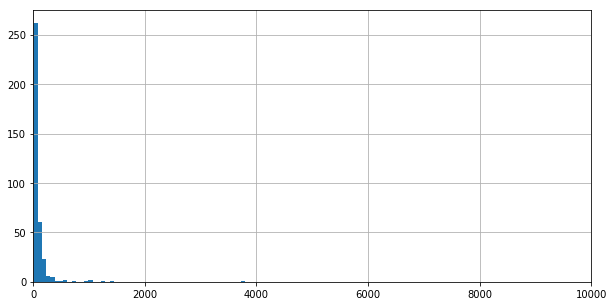

In [26]:
fig, ax =plt.subplots(figsize=(10,5))
ax.set_xlim(0,10000)
usdf.price.hist(ax=ax, bins=50)

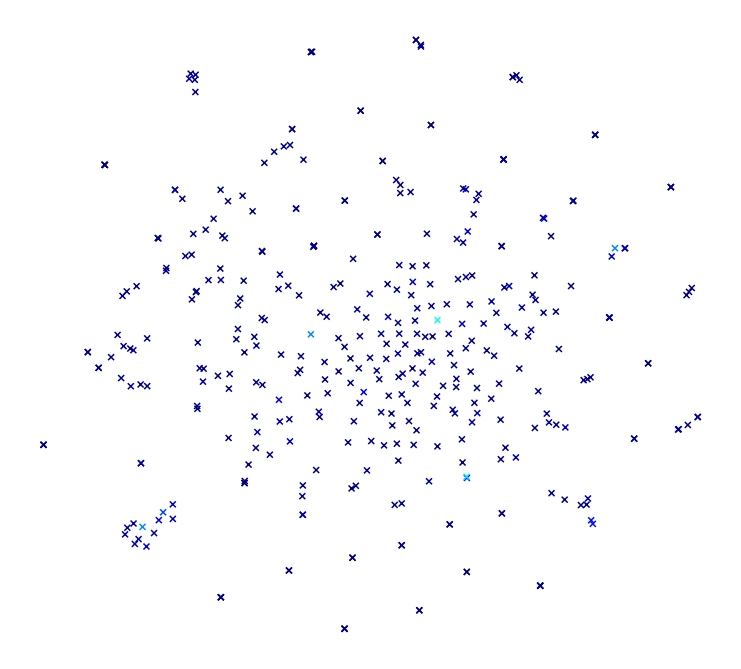

In [27]:
from matplotlib import cm
from matplotlib import colors
norm = cm.colors.Normalize(vmax=usdf.price.values.max(), vmin=usdf.price.values.min())
cmap = cm.jet

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=usdf.price.values, marker="x", cmap=cmap, norm=norm)

In [28]:
from scipy.cluster import  hierarchy

In [29]:
#Clustering
X = tfidf.todense()
threshold = 0.1
Z = hierarchy.linkage(X,"average", metric="cosine")
#Clustering
maxclust = 20
C = hierarchy.fcluster(Z, maxclust, criterion="maxclust")
#C = hierarchy.fcluster(Z, threshold, criterion="distance")

In [30]:
len(C)

368

In [31]:
len(np.unique(C))

20

In [33]:
usdf['clusters'] = C
usdf.head()

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,cur,description,favorites,image_urls,images,overview,price,script,title,desc,adesc,clusters
0,USD,delicate baguette diamond solitaire necklace ...,938.0,[https://i.etsystatic.com/11493911/r/il/034d80...,[{'url': 'https://i.etsystatic.com/11493911/r/...,"[\n Handmade item\n, \n Gemstone: Diamon...",389.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...","Baguette Diamond Necklace, Diamond Solitaire N...",delic baguett diamond solitair necklac gold en...,delic baguett diamond solitair necklac gold en...,16
1,USD,something oldsomething newsomething borrowedso...,87.0,[https://i.etsystatic.com/7249318/r/il/0163b5/...,[{'url': 'https://i.etsystatic.com/7249318/r/i...,"[\n Pendant height: 19\n, \n Pendant wid...",10.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Sixpence Bezel Holder Pendant,someth oldsometh newsometh borrowedsometh blue...,someth oldsometh newsometh borrowedsometh blue...,1
2,USD,please write a note your initials or birth mon...,4196.0,[https://i.etsystatic.com/6666729/r/il/c0f976/...,[{'url': 'https://i.etsystatic.com/6666729/r/i...,"[\n Handmade item\n, \n Gemstone: Turquo...",14.50,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Initial Necklace Personalized Birthstone Neckl...,pleas write note initi birth month note lalacr...,pleas write note initi birth month note lalacr...,16
3,USD,3 colors pineapple necklacethe pendant measure...,2005.0,[https://i.etsystatic.com/12209477/r/il/c3fa48...,[{'url': 'https://i.etsystatic.com/12209477/r/...,"[\n Handmade item\n, \n Materials: Gold ...",7.50,"[\n {\n ""@type"": ""Product"",\n ""@conte...","Rose Gold Pineapple Necklace, Fruit Necklace, ...",3 color pineappl necklaceth pendant measur 8mm...,color pineappl necklaceth pendant measur x cha...,16
4,USD,get 10 off your order when you join our email...,7501.0,[https://i.etsystatic.com/9886199/r/il/61a5e1/...,[{'url': 'https://i.etsystatic.com/9886199/r/i...,"[\n Handmade item\n, \n Closure: Lobster...",4.25,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Boho Charm Choker Necklace - Leather Choker - ...,get 10 order join email list join choker neckl...,get order join email list join choker necklac ...,16


In [39]:
fdist_hiprice = FreqDist(word for word in ' '.join(usdf[usdf['price']>100]['desc'].values).split() if not word.isnumeric())
fdist_hiprice.pprint(maxlen=20)

FreqDist({'necklac': 553, 'gold': 432, 'diamond': 340, 'pleas': 261, 'pendant': 247, 'ship': 217, 'gift': 208, 'jewelri': 182, 'order': 174, 'item': 173, '14k': 169, 'day': 157, 'chain': 141, 'color': 141, 'us': 132, 'size': 127, 'silver': 124, 'one': 122, 'made': 122, 'piec': 120, ...})


In [40]:
fdist_loprice = FreqDist(word for word in ' '.join(usdf[usdf['price']<25]['desc'].values).split() if not word.isnumeric())
fdist_loprice.pprint(maxlen=20)

FreqDist({'necklac': 469, 'gold': 273, 'gift': 239, 'pleas': 220, 'silver': 208, 'order': 201, 'jewelri': 196, 'chain': 183, 'ship': 179, 'plate': 157, 'length': 149, 'us': 144, 'note': 140, 'day': 128, 'inch': 127, 'item': 125, 'box': 115, 'link': 113, 'sterl': 112, 'wear': 109, ...})


In [41]:
tfidf.shape

(368, 5859)

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [46]:
y = usdf['price'].values

In [56]:
y.shape

(368,)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [58]:
regr_rf = RandomForestRegressor(n_estimators=20, max_depth=None,min_samples_split=2, random_state=2, oob_score=True)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=True, random_state=2, verbose=0, warm_start=False)

In [59]:
y_rf = regr_rf.predict(X_test)

In [78]:
X!=tfidf

matrix([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])

In [65]:
regr_rf.score(X_test,y_test)

0.0003336346808214818

In [64]:
regr_rf.oob_score_

-0.07239822855518785

In [62]:
np.sqrt(np.mean(np.square(y_rf-y_test)))

451.92140362724086

In [ ]:
closeby = np.zeros(len(usdf))
eps = 1.0
for index, row in usdf.iterrows():
    if(index<len(usdf)-2):
        i2 = index+1
        row2=usdf.iloc[i2]
        while(row['clusters']==row2['clusters']):
            #print(row[['price','title']], row2[['price','title']])
            if (np.abs(float(row['price'])-float(row2['price']))<eps):
                closeby[i2]=1
            if(i2<len(usdf)-1): 
                i2+=1
                row2=usdf.iloc[i2]
        

In [ ]:
np.sum(closeby)

In [ ]:
len(C)

In [ ]:
len(np.unique(C))

In [ ]:
len(C)-len(np.unique(C))

In [ ]:
usdf.reset_index(drop=True)

In [ ]:
usdf.groupby('clusters')['price'].std()

### Lets have 20 clusters

In [ ]:
#Clustering
maxclust = 20
C20 = hierarchy.fcluster(Z, maxclust, criterion="maxclust")

In [ ]:
np.unique(C20)

In [ ]:
usdf['c20'] = C20
usdf.head()

In [ ]:
usdf['overview'].apply(lambda x: print(x))

In [ ]:
'vintage' in ' '.join(['\n    Vintage item\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']).lower()

In [ ]:
import re
re.findall(r'\d{4}',' '.join(['\n    Vintage item \n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']))

In [ ]:
usdf['vintage'] = usdf['overview'].apply(lambda x: int('vintage' in ' '.join(x).lower()))

In [ ]:
usdf['year'] = usdf['overview'].apply(lambda x: re.findall(r'\d{4}',' '.join(x).lower())[0] if(len(re.findall(r'\d{4}',' '.join(x).lower()))>0) else np.nan)

In [ ]:
usdf['handmade'] = usdf['overview'].apply(lambda x: int('handmade' in ' '.join(x).lower() or 'hand-made' in ' '.join(x).lower()))

In [ ]:
def extract_materials(ov):
    l = [re.sub(r"[^a-zA-Z\d\s]", '', x).lower().replace('materials','').replace('material','').strip() for x in ov if 'materials' in x.lower() or 'material' in x.lower()] 
    return l[0] if len(l)>0 else np.nan
    
usdf['materials'] = usdf['overview'].apply(extract_materials)

In [ ]:
usdf.columns

In [ ]:
usdf.head()